## Logistic Regression

<img src="./images/anime.png" width="500"/>

Вычислительный граф для модели логистической регрессии:

![caption](./images/graph.png)

Алгоритм SGD:

0) инициализируем веса  
1) сэмплируем batch_size примеров из выборки  
2) forward pass: вычисляем значения в узлах вычислительного графа  
3) backward pass: считаем градиенты $\frac{dL}{dw}$ Loss-функции по отношению к параметрам модели  
4) обновляем параметры:  
$$ w := w - lr*\frac{dL}{dw} $$  
5) Если не выполнен критерий завершения (превышено число итераций / параметры перестали существенно изменяться и т.п.), вернуться на шаг 1  

Реализуйте вычисление сигмоиды и постройте ее график в одномерном случае

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
def sigmoid(x):
    #your code here
    pass

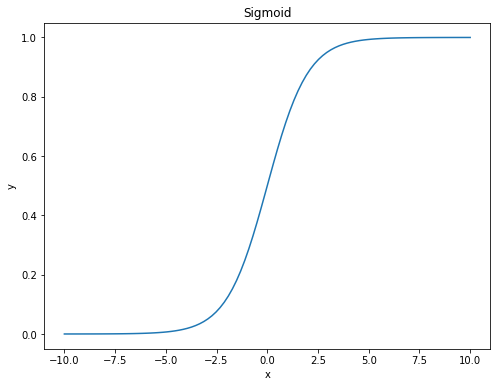

In [3]:
plt.figure(figsize=(8, 6))

#your code here
pass

plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Реализуйте методы fit, predict, BCE, _init_weights в классе LogisticRegression.

In [4]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None
        
    @staticmethod
    def sigmoid(x):
        return sigmoid(x)
    
    @staticmethod
    def transform_one_hot(y):
        n_classes = max(y)+1 # classes start from 0
        one_hot = np.zeros(shape=(y.shape[0], n_classes))
        one_hot[tuple((np.arange(y.shape[0]), y))] = 1
        y = one_hot
        return y
    
    @staticmethod
    def loss(*args, **kwargs):
        return LogisticRegression.BCE(*args, **kwargs)
        
    @staticmethod
    def BCE(y, x):
        pred = np.maximum(x, 1e-5)
        #your code here
        pass
    
    @staticmethod
    def sample_batch(X_train, y_train, batch_size):
        if batch_size is None:
            rand_idx = np.random.permutation(X_train.shape[0])[:batch_size]
            X, y = X_train[rand_idx, ...], y_train[rand_idx, ...]
        else:
            X, y = X_train, y_train
        return X, y
    
    def fit(self, 
            X_train, y_train, 
            iters=10000, 
            lr_base=0.01, 
            steps=4, 
            batch_size=None, 
            print_freq=20):
        
        """
        fit model to data
        
        params:
            X_train, y_train - training data. Shapes are:
                X_train: (N_samples, N_features),
                y_train: (N_samples, N_classes),
            iters - number of iterations to train
            lr_base - base learning rate
            steps - number of steps to drop the LR
            batch_size - batch size (== X.shape[0] if None)
            weight decay - lambda coefficient for L2 regularization
            print_freq - frequency of logging
        """
        
        self.N = X_train.shape[0]
        self.D = X_train.shape[1]
        self.O = y_train.shape[1]
        if  self.w is None or \
            self.b is None or \
            self.w.shape != (self.D, self.O) or \
            self.b.shape != (1., self.O):
            
            self._init_weights()
            
        for i in range(iters):
            
            # sample data
            X, y = self.sample_batch(X_train, y_train, batch_size)

            #your code here
        
            # forward pass
        
            # backward pass
        
            # update params
        
            # log

        return self
    
    def predict(self, X):
        #your code here
        pass
    
    def _init_weights(self):
        #your code here
        pass

Протестируйте обучение модели на простом примере

In [5]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [1]])

In [6]:
model = LogisticRegression().fit(X, y)

iter: 0, loss: 0.688, lr: 0.01000
iter: 20, loss: 0.654, lr: 0.01000
iter: 40, loss: 0.624, lr: 0.01000
iter: 60, loss: 0.599, lr: 0.01000
iter: 80, loss: 0.577, lr: 0.01000
iter: 100, loss: 0.558, lr: 0.01000
iter: 120, loss: 0.541, lr: 0.01000
iter: 140, loss: 0.526, lr: 0.01000
iter: 160, loss: 0.513, lr: 0.01000
iter: 180, loss: 0.501, lr: 0.01000
iter: 200, loss: 0.490, lr: 0.01000
iter: 220, loss: 0.481, lr: 0.01000
iter: 240, loss: 0.472, lr: 0.01000
iter: 260, loss: 0.464, lr: 0.01000
iter: 280, loss: 0.457, lr: 0.01000
iter: 300, loss: 0.451, lr: 0.01000
iter: 320, loss: 0.445, lr: 0.01000
iter: 340, loss: 0.439, lr: 0.01000
iter: 360, loss: 0.434, lr: 0.01000
iter: 380, loss: 0.429, lr: 0.01000
iter: 400, loss: 0.424, lr: 0.01000
iter: 420, loss: 0.420, lr: 0.01000
iter: 440, loss: 0.416, lr: 0.01000
iter: 460, loss: 0.412, lr: 0.01000
iter: 480, loss: 0.408, lr: 0.01000
iter: 500, loss: 0.405, lr: 0.01000
iter: 520, loss: 0.401, lr: 0.01000
iter: 540, loss: 0.398, lr: 0.0100

In [7]:
model.predict(X)

array([[0.43290241],
       [0.85278909],
       [0.85280612],
       [0.97776163]])

Протестируйте обучение модели на другом примере.

In [8]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [0]])

In [9]:
model = LogisticRegression().fit(X, y)

iter: 0, loss: 0.693, lr: 0.01000
iter: 20, loss: 0.693, lr: 0.01000
iter: 40, loss: 0.693, lr: 0.01000
iter: 60, loss: 0.693, lr: 0.01000
iter: 80, loss: 0.693, lr: 0.01000
iter: 100, loss: 0.693, lr: 0.01000
iter: 120, loss: 0.693, lr: 0.01000
iter: 140, loss: 0.693, lr: 0.01000
iter: 160, loss: 0.693, lr: 0.01000
iter: 180, loss: 0.693, lr: 0.01000
iter: 200, loss: 0.693, lr: 0.01000
iter: 220, loss: 0.693, lr: 0.01000
iter: 240, loss: 0.693, lr: 0.01000
iter: 260, loss: 0.693, lr: 0.01000
iter: 280, loss: 0.693, lr: 0.01000
iter: 300, loss: 0.693, lr: 0.01000
iter: 320, loss: 0.693, lr: 0.01000
iter: 340, loss: 0.693, lr: 0.01000
iter: 360, loss: 0.693, lr: 0.01000
iter: 380, loss: 0.693, lr: 0.01000
iter: 400, loss: 0.693, lr: 0.01000
iter: 420, loss: 0.693, lr: 0.01000
iter: 440, loss: 0.693, lr: 0.01000
iter: 460, loss: 0.693, lr: 0.01000
iter: 480, loss: 0.693, lr: 0.01000
iter: 500, loss: 0.693, lr: 0.01000
iter: 520, loss: 0.693, lr: 0.01000
iter: 540, loss: 0.693, lr: 0.0100

In [10]:
model.predict(X)

array([[0.50003043],
       [0.49991707],
       [0.50009259],
       [0.49997923]])

Каким получается качество? Почему так происходит?

## Боевое применение 

Протестируйте написанную вами модель логистической регрессии на датасете для классификации ирисов. Подробнее об этом датасете: https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Разделим данные на обучающую и валидационную выборку. Сконвертируем y в формат one_hot_encoding и обучим модель.

In [12]:
X, y = load_iris(return_X_y=True)
# make y one-hot encoded:
y = LogisticRegression.transform_one_hot(y)
print(X.shape, y.shape, y.min(), y.max())
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.25)

(150, 4) (150, 3) 0.0 1.0


In [13]:
model = LogisticRegression().fit(X_train, y_train, lr_base=0.1, batch_size=32)

iter: 0, loss: 0.704, lr: 0.10000
iter: 20, loss: 0.409, lr: 0.10000
iter: 40, loss: 0.352, lr: 0.10000
iter: 60, loss: 0.325, lr: 0.10000
iter: 80, loss: 0.309, lr: 0.10000
iter: 100, loss: 0.297, lr: 0.10000
iter: 120, loss: 0.288, lr: 0.10000
iter: 140, loss: 0.280, lr: 0.10000
iter: 160, loss: 0.274, lr: 0.10000
iter: 180, loss: 0.269, lr: 0.10000
iter: 200, loss: 0.264, lr: 0.10000
iter: 220, loss: 0.260, lr: 0.10000
iter: 240, loss: 0.256, lr: 0.10000
iter: 260, loss: 0.253, lr: 0.10000
iter: 280, loss: 0.250, lr: 0.10000
iter: 300, loss: 0.247, lr: 0.10000
iter: 320, loss: 0.244, lr: 0.10000
iter: 340, loss: 0.242, lr: 0.10000
iter: 360, loss: 0.240, lr: 0.10000
iter: 380, loss: 0.238, lr: 0.10000
iter: 400, loss: 0.236, lr: 0.10000
iter: 420, loss: 0.234, lr: 0.10000
iter: 440, loss: 0.233, lr: 0.10000
iter: 460, loss: 0.231, lr: 0.10000
iter: 480, loss: 0.230, lr: 0.10000
iter: 500, loss: 0.228, lr: 0.10000
iter: 520, loss: 0.227, lr: 0.10000
iter: 540, loss: 0.226, lr: 0.1000

Подсчитаем точность. Постарайтесь сделать так, чтобы точность была не ниже 85 %. Возможно понадобится покрутить параметры модели (или починить баги :)

In [14]:
pred_val = model.predict(X_val).argmax(axis=1)
gt_val = y_val.argmax(axis=1)
acc = 1 - (pred_val != gt_val).sum() / y_val.shape[0]
print("model accuracy:", acc)

model accuracy: 0.9473684210526316


## Визуализация 

Визуализируйте разделяющую плоскость. Тестируйте на двумерных синтетических данных для простоты дебага и визуализации.

In [15]:
np.random.seed(0)

# create some dummy data
C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.concatenate([np.ones(200, dtype=np.int32), np.zeros(200, dtype=np.int32)])[:, None]

# plot_decision_boundary
model = LogisticRegression().fit(X, y, lr_base=0.01)


iter: 0, loss: 0.689, lr: 0.01000
iter: 20, loss: 0.615, lr: 0.01000
iter: 40, loss: 0.594, lr: 0.01000
iter: 60, loss: 0.584, lr: 0.01000
iter: 80, loss: 0.577, lr: 0.01000
iter: 100, loss: 0.572, lr: 0.01000
iter: 120, loss: 0.567, lr: 0.01000
iter: 140, loss: 0.562, lr: 0.01000
iter: 160, loss: 0.558, lr: 0.01000
iter: 180, loss: 0.554, lr: 0.01000
iter: 200, loss: 0.551, lr: 0.01000
iter: 220, loss: 0.547, lr: 0.01000
iter: 240, loss: 0.544, lr: 0.01000
iter: 260, loss: 0.540, lr: 0.01000
iter: 280, loss: 0.537, lr: 0.01000
iter: 300, loss: 0.534, lr: 0.01000
iter: 320, loss: 0.531, lr: 0.01000
iter: 340, loss: 0.528, lr: 0.01000
iter: 360, loss: 0.525, lr: 0.01000
iter: 380, loss: 0.523, lr: 0.01000
iter: 400, loss: 0.520, lr: 0.01000
iter: 420, loss: 0.517, lr: 0.01000
iter: 440, loss: 0.515, lr: 0.01000
iter: 460, loss: 0.512, lr: 0.01000
iter: 480, loss: 0.510, lr: 0.01000
iter: 500, loss: 0.507, lr: 0.01000
iter: 520, loss: 0.505, lr: 0.01000
iter: 540, loss: 0.503, lr: 0.0100

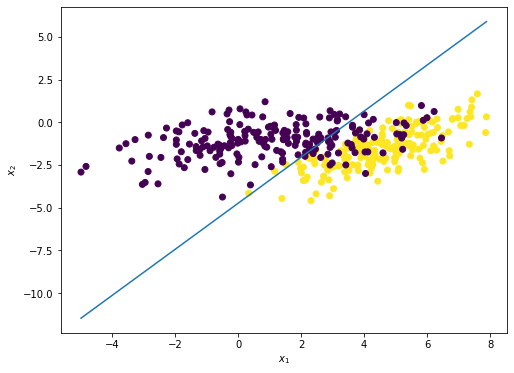

In [16]:
#your code here
xticks = None
yticks = None

plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=y[:, 0])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot(xticks, yticks)

Визуализируем также с помощью трехмерного графика как изменяются предсказания модели в зависимости от точки пространства.

Text(0.5, 0, 'prob')

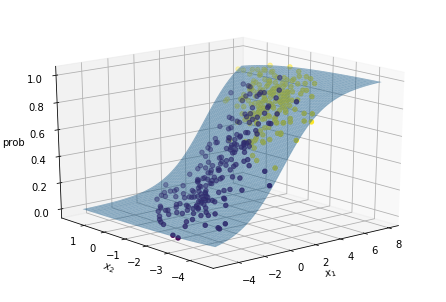

In [17]:
xticks = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yticks = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

pred = model.sigmoid(model.w[0, 0]*X[:, 0] + model.w[1, 0]*X[:, 1] + model.b[0, 0])

xxx, yyy = np.meshgrid(xticks, yticks)
zzz = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])
zticks = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])


fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig, azim=-130, elev=20)

ax.scatter(X[:,0], X[:,1], pred, c=y[:, 0])
ax.plot_surface(xxx, yyy, zzz, alpha=0.5)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("prob")